# Project 3 - 01 : Data cleaning / EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, json
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/OC_IML/OC_IML_P3_elec/Pelec_04_data"

# seaborn
sns.set()
sns.set_style("dark")
plt.style.use('fivethirtyeight')

# pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.options.display.max_colwidth = 500

# plotly
plotly_base_params = {
    'template': "plotly_white",
    'title_font': dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
    'font': dict(color='#424242'), 
    'hoverlabel': dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif")
}

## Loading Data

In [3]:
# Data 2015 Import
data2015 = pd.read_csv(os.path.join(DATA_DIR, '2015-building-energy-benchmarking.csv'), sep=',')
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [4]:
data2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                                                                                                                                        Location  \
0   {'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}   
1     {'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}   
2    {'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}   
3  {'latitude': '47.61421585', 'longitude': '-122.33660889', 'human_address': '{"address": "620 STEWART ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}   
4     {'latitude': '47.6137544', 'longitude': '-122.3409238', 'human_address': '{"address": "401 LENORA ST", "city": "SEATTLE", "state": "WA", "zip": "98121"}'}   

   CouncilDistrictCode Neighborhood  YearBuilt  NumberofBuildings  \
0                    7     DOWNTOWN       1927                  1   
1                    7     DOWNTOWN       1996                  1   
2                    7     DOWNTOWN       1969                  1   
3                    7     DOWNTOWN       1926                  1   
4                    7     DOWNTOWN       1980                  1   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0          12.000             88434                   0   
1          11.000            103566               15064   
2          41.000            961990                   0   
3          10.000             61320                   0   
4          18.000            119890               12460   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  961990  Hotel, Parking, Swimming Pool   
3                   61320                          Hotel   
4                  107430  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                  88434.000   
1                  Hotel                  83880.000   
2                  Hotel                 757243.000   
3                  Hotel                  61320.000   
4                  Hotel                 123445.000   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                        15064.000   
2                      Parking                       100000.000   
3                          NaN                              NaN   
4                      Parking                        68009.000   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                        4622.000   
2               Swimming Pool                           0.000   
3                         NaN                             NaN   
4               Swimming Pool                           0.000   

  YearsENERGYSTA

In [5]:
# Data 2016 Import
data2016 = pd.read_csv(os.path.join(DATA_DIR, '2016-building-energy-benchmarking.csv'), sep=',')
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
data2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State   ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA 98101.000   
1              Paramount Hotel  724 Pine street  Seattle    WA 98101.000   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA 98101.000   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA 98101.000   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA 98121.000   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN    47.612   
1                    0659000220                    7     DOWNTOWN    47.613   
2                    0659000475                    7     DOWNTOWN    47.614   
3                    0659000640                    7     DOWNTOWN    47.614   
4                    0659000970                    7     DOWNTOWN    47.614   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0   -122.338       1927              1.000              12             88434   
1   -122.334       1996              1.000              11            103566   
2   -122.338       1969              1.000              41            956110   
3   -122.337       1926              1.000              10             61320   
4   -122.340       1980              1.000              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                  88434.000   
1                  Hotel                  83880.000   
2                  Hotel                 756493.000   
3                  Hotel                  61320.000   
4                  Hotel                 123445.000   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                        15064.000   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                        68009.000   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                        4622.000   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                           0.000   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN           60.000            81.700   
1                      NaN           61.000            94.800   
2                      NaN           43.000            96.000   
3                      NaN           56.000           110.800   
4                      NaN           75.000           114.800   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0              84.300             182.500               189.000   
1              97.900             176.100               179.40

### Columns metadata
<a name="metadata"></a>
For a better understanding of the different columns and a comparison of the 2 datasets

After running the 2 following cells it's possible to select a column and it will automatically display its description

In [7]:
metadata = {}
for year in [2015, 2016]:
    filename = f"socrata_metadata_{year}-building-energy-benchmarking.json"
    with open(os.path.join(DATA_DIR, filename), "r") as read_file:
        metadata = json.load(read_file)
    # get col description
    current_descr = {x['name']: x.get('description', 'No description.') for x in metadata['columns']}
    metadata.update(current_descr)

def display_metadata(column):
    print(f"\n{column}: {metadata.get(column, 'No description.')}")

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

out = interact(display_metadata, column=sorted(set(list(data2015.columns) + list(data2016.columns))))

interactive(children=(Dropdown(description='column', options=('2010 Census Tracts', 'Address', 'BuildingType',…

## Cleaning Data

### Merge datasets

In [9]:
cols_only_2015, cols_only_2016 = list(set(data2015.columns)-set(data2016.columns)), list(set(data2016.columns)-set(data2015.columns))
if cols_only_2015:
    print("Columns only in 2015 data:\n -", '\n - '.join(cols_only_2015))
if cols_only_2016:
    print("Columns only in 2016 data:\n -", '\n - '.join(cols_only_2016))

Columns only in 2015 data:
 - Seattle Police Department Micro Community Policing Plan Areas
 - GHGEmissions(MetricTonsCO2e)
 - City Council Districts
 - 2010 Census Tracts
 - SPD Beats
 - Location
 - Comment
 - Zip Codes
 - OtherFuelUse(kBtu)
 - GHGEmissionsIntensity(kgCO2e/ft2)
Columns only in 2016 data:
 - State
 - Longitude
 - Latitude
 - GHGEmissionsIntensity
 - Address
 - TotalGHGEmissions
 - City
 - ZipCode
 - Comments


**Renaming columns to assemble those that are clearly the same**

With the help of the [metadata](#metadata)

In [10]:
data2015.rename(columns={'Zip Codes':'zipcode',
                         'Comment':'comment',
                         'GHGEmissions(MetricTonsCO2e)':'GHG_emissions_TCO2e',
                         'GHGEmissionsIntensity(kgCO2e/ft2)':'GHG_intensity_kgCO2e_ft2'}, inplace=True)

In [11]:
data2016.rename(columns={'Address':'address',
                         'City':'city',
                         'State':'state',
                         'ZipCode':'zipcode',
                         'Latitude':'latitude',
                         'Longitude':'longitude',
                         'Comments':'comment',
                         'TotalGHGEmissions':'GHG_emissions_TCO2e', 
                         'GHGEmissionsIntensity':'GHG_intensity_kgCO2e_ft2'}, inplace=True)

#### Parsing 'Location' column

In [12]:
from ast import literal_eval

loc_2015 = data2015.Location.astype(str).apply(lambda x: literal_eval(x))
loc_2015 = pd.json_normalize(loc_2015)
loc_2015 = pd.concat([
    loc_2015.drop(columns=['human_address']),
    pd.json_normalize(loc_2015.human_address.apply(lambda x: literal_eval(x)))
], axis=1)
loc_2015.head()

latitude      longitude         address     city state    zip
0  47.61219025  -122.33799744   405 OLIVE WAY  SEATTLE    WA  98101
1  47.61310583  -122.33335756     724 PINE ST  SEATTLE    WA  98101
2  47.61334897  -122.33769944    1900 5TH AVE  SEATTLE    WA  98101
3  47.61421585  -122.33660889  620 STEWART ST  SEATTLE    WA  98101
4   47.6137544   -122.3409238   401 LENORA ST  SEATTLE    WA  98121

In [13]:
data2015 = pd.concat([
    data2015.drop(columns=['Location']),
    loc_2015
], axis=1)

In [14]:
# comparison of the 2 zipcode columns with the 2016 dataset
print("2015 'zipcode' == 2016 'zipcode' :", data2016[data2016['zipcode'].astype(float).isin(data2015['zipcode'].astype(float))].shape[0])
print("2015 'zip' == 2016 'zipcode' :", data2016[data2016['zipcode'].astype(float).isin(data2015['zip'].astype(float))].shape[0])

2015 'zipcode' == 2016 'zipcode' : 0
2015 'zip' == 2016 'zipcode' : 3317


In [15]:
# replace 'zipcode' values by 'zip' values
data2015['zipcode'] = data2015.pop('zip')

#### Remaining single columns

In [16]:
cols_only_2015, cols_only_2016 = list(set(data2015.columns)-set(data2016.columns)), list(set(data2016.columns)-set(data2015.columns))
if cols_only_2015:
    print("Columns only in 2015 data:\n -", '\n - '.join(cols_only_2015))
if cols_only_2016:
    print("Columns only in 2016 data:\n -", '\n - '.join(cols_only_2016))

Columns only in 2015 data:
 - Seattle Police Department Micro Community Policing Plan Areas
 - City Council Districts
 - SPD Beats
 - 2010 Census Tracts
 - OtherFuelUse(kBtu)


In [17]:
for col in cols_only_2015:
    print(f"{col}: {metadata.get(col, 'No description.')}")

Seattle Police Department Micro Community Policing Plan Areas: No description.
City Council Districts: No description.
SPD Beats: No description.
2010 Census Tracts: No description.
OtherFuelUse(kBtu): No description.


The [metadata section](#metadata) does not give any description for the remaining columns that are only in the 2015 dataset. 
- [SPD Beats](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::seattle-police-beats-2015-2017/about): geographical data
- [Seattle Police Department Micro Community Policing Plan Areas](https://www.seattle.gov/police/information-and-data/mcpp-about): geographical data
- [2010 Census Tracts](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::census-tracts-2010/about): geographical data
- [City Council Districts](https://www.seattle.gov/cityclerk/agendas-and-legislative-resources/find-your-council-district#finddistrict): geographical data
- OtherFuelUse(kBtu) : Buildings using fuel


In [18]:
data2015[cols_only_2015].isnull().sum()

Seattle Police Department Micro Community Policing Plan Areas       2
City Council Districts                                           3127
SPD Beats                                                           2
2010 Census Tracts                                               3116
OtherFuelUse(kBtu)                                                 10
dtype: int64

In [19]:
data2015['OtherFuelUse(kBtu)'].value_counts()

0.000          3313
6464408.000       1
178094.000        1
143134.000        1
5596.000          1
229942.000        1
145944.000        1
427938.000        1
1943011.000       1
12551.000         1
547.000           1
15527.000         1
2304567.000       1
2944419.000       1
337952.000        1
8269669.000       1
177849.000        1
182715.000        1
Name: OtherFuelUse(kBtu), dtype: int64

The only interesting column is the fuel consumption. However, most values are 0 and this column is not available in the 2016 data. 

It is therefore possible to delete these 5 columns to finally merge the 2 datasets.

In [20]:
# drop remaining single columns
data2015.drop(columns=cols_only_2015, inplace=True)

# concat the 2 datasets
data = pd.concat([data2015, data2016], ignore_index=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

In [21]:
# removing parenthesis and '/' from columns names
new_names = {}
for col in data.columns:
    new_names[col] = col.replace('(', '_')
    new_names[col] = new_names[col].replace(')', '')
    new_names[col] = new_names[col].replace('/', '')

data = data.rename(columns=new_names)

data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding_s',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI_kBtusf', 'SiteEUIWN_kBtusf',
       'SourceEUI_kBtusf', 'SourceEUIWN_kBtusf', 'SiteEnergyUse_kBtu',
       'SiteEnergyUseWN_kBtu', 'SteamUse_kBtu', 'Electricity_kWh',
       'Electricity_kBtu', 'NaturalGas_therms', 'NaturalGas_kBtu',
       'GHG_emissions_TCO2e', 'GHG_intensity_kgCO2e_ft2', 'DefaultData',
       'comment', 'ComplianceStatus', 'Outlier', 'zipcode', 'latitude',
       'lon

#### Data Types

In [22]:
# convert numeric features conserving missing values
data = data.astype({
    'longitude': 'float',
    'latitude': 'float',
    'YearsENERGYSTARCertified': int
}, errors='ignore')

# lower all strings
for col in data.select_dtypes([object]).columns:
    data[col] = data[col].str.lower()

**Categorical Features**

We are looking for:
- features with only one unique value
- categorical features with only one row for a category
- string binary features 

In [23]:
str_cols = data.select_dtypes([object]).columns.to_list()
categ_cols = [
    'BuildingType',
    'PrimaryPropertyType',
    'LargestPropertyUseType',
    'SecondLargestPropertyUseType',
    'ThirdLargestPropertyUseType',
    'ComplianceStatus',
    'Neighborhood',
    'city',
    'state',
    'Outlier',
    'DefaultData',
    'zipcode',
    'CouncilDistrictCode'
]

data[categ_cols] = data[categ_cols].astype('category')

for col in data[str_cols].columns:
    val_cnt = data[col].value_counts()
    # only one value in the column
    if val_cnt.shape[0] == 1:
        print(f"{col} - contains only one unique value: '{val_cnt.index[0]}'\n")
        # drop the column
        data.drop(columns=[col], inplace=True)

    # binary feature
    elif val_cnt.shape[0] == 2:
        print(f"{col} - string type binary: {' / '.join(val_cnt.index)}\n")

    # categorical feature
    elif col in categ_cols:
        print(f"{col} - {val_cnt.shape[0]} categs")
        if val_cnt.shape[0] <= 10:
            print(' ', '; '.join(val_cnt.index))

        # only one row for a categ in categorical feature
        one_row_categs = val_cnt[val_cnt == 1].index.to_list()
        if one_row_categs:
            print(f"- {len(one_row_categs)} of categ with only one row:")
            # print 5 categ max 
            if len(one_row_categs) > 10:
                print(' ', '; '.join(one_row_categs[:5]), f"... and {len(one_row_categs)-10} more")
            else:
                print(' ', '; '.join(one_row_categs))
        print()

BuildingType - 8 categs
  nonresidential; multifamily lr (1-4); multifamily mr (5-9); multifamily hr (10+); sps-district k-12; nonresidential cos; campus; nonresidential wa
- 1 of categ with only one row:
  nonresidential wa

PrimaryPropertyType - 32 categs

Neighborhood - 14 categs
- 1 of categ with only one row:
  delridge neighborhoods

LargestPropertyUseType - 57 categs
- 1 of categ with only one row:
  outpatient rehabilitation/physical therapy

SecondLargestPropertyUseType - 50 categs
- 3 of categ with only one row:
  enclosed mall; personal services (health/beauty, dry cleaning, etc); pre-school/daycare

ThirdLargestPropertyUseType - 45 categs
- 5 of categ with only one row:
  enclosed mall; other - utility; other - public services; college/university; vocational school

DefaultData - string type binary: no / yes

ComplianceStatus - 5 categs
  compliant; error - correct default data; non-compliant; missing data; not compliant

Outlier - string type binary: low outlier / high out

In [24]:
# display neighborhood categories
data.Neighborhood.value_counts()

downtown                  1151
east                       897
magnolia / queen anne      843
greater duwamish           744
northeast                  539
lake union                 500
northwest                  447
north                      375
southwest                  331
central                    265
ballard                    263
southeast                  191
delridge                   169
delridge neighborhoods       1
Name: Neighborhood, dtype: int64

In [25]:
data['Neighborhood'] = data['Neighborhood'].replace('delridge neighborhoods', 'delridge')
data['BuildingType'] = data['BuildingType'].replace('nonresidential wa', 'nonresidential')

data = data[data['LargestPropertyUseType'] != 'outpatient rehabilitation/physical therapy']
data = data[~data['SecondLargestPropertyUseType'].isin(["enclosed mall", "personal services (health/beauty, dry cleaning, etc)", "pre-school/daycare"])]
data = data[~data['ThirdLargestPropertyUseType'].isin(['enclosed mall', 'other - utility', 'other - public services', 'college/university', 'vocational school'])]

**ListOfAllPropertyUseTypes from string to list**

The column contains the list of all uses of a building as a comma separated string. Some uses are followed with subcategories between parenthesis.   

In [26]:
def delete_parenthesis(s):
    "Delete everything between parenthesis in a string"
    if not isinstance(s, str):
        return
    to_rmv = s[s.find("(")-1:s.find(")")+1]
    while to_rmv:
        s = s.replace(to_rmv, "")
        to_rmv = s[s.find("(")-1:s.find(")")+1]
    return s

# delete parenthesis in the lists
data['ListOfAllPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].apply(lambda x: delete_parenthesis(x))
# splits lists
data['ListOfAllPropertyUseTypes'] = [x.split(', ') if x else x for x in data['ListOfAllPropertyUseTypes']]

### Drop residential buildings and duplicates
This study covers only non-residential buildings.

In [27]:
data['BuildingType'].value_counts().sort_values()

campus                    45
nonresidential cos       153
sps-district k-12        197
multifamily hr (10+)     216
multifamily mr (5-9)    1133
multifamily lr (1-4)    2047
nonresidential          2916
Name: BuildingType, dtype: int64

In [28]:
residential_categ = ['multifamily hr (10+)', 'multifamily mr (5-9)', 'multifamily lr (1-4)']
data = data[~data['BuildingType'].isin(residential_categ)]

print(f"Remaining data : {data.shape[0]} rows / {data.shape[1]} columns")      

Remaining data : 3311 rows / 44 columns


**Drop oldest data for duplicated buildings**

In [29]:
duplicates_rate = data[data.duplicated(['OSEBuildingID'])].shape[0] / data.OSEBuildingID.nunique() * 100
print(f"We have the consumption history (2015 and 2016) for {duplicates_rate:.2f}% of buildings")

We have the consumption history (2015 and 2016) for 95.11% of buildings


In [30]:
# sort by dataYear
data = data.sort_values('OSEBuildingID')
# drop oldest values for duplicates
data = data.drop_duplicates(subset='OSEBuildingID', keep='last')
# set building ID as index
data = data.set_index('OSEBuildingID')

print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

Remaining data : 1697 rows / 43 columns


### Outliers

The 'Outlier' feature indicates whether a property is a high or low outlier, but it has only a few values.

In [31]:
data[data.Outlier.notnull()].shape[0]

25

In [32]:
data.describe().T

count        mean          std       min  \
DataYear                        1697.000    2015.504        0.500  2015.000   
YearBuilt                       1697.000    1961.702       32.860  1900.000   
NumberofBuildings               1697.000       1.151        2.911     0.000   
NumberofFloors                  1692.000       4.114        6.525     0.000   
PropertyGFATotal                1697.000  118522.526   295506.216 11285.000   
PropertyGFAParking              1697.000   13160.280    43994.873    -2.000   
PropertyGFABuilding_s           1697.000  105362.246   281357.365  3636.000   
LargestPropertyUseTypeGFA       1658.000   99074.507   278174.587  5656.000   
SecondLargestPropertyUseTypeGFA  849.000   36614.836    69865.062     0.000   
ThirdLargestPropertyUseTypeGFA   349.000   14625.573    36731.732     0.000   
ENERGYSTARScore                 1127.000      64.915       28.519     1.000   
SiteEUI_kBtusf                  1691.000      71.960       73.186     0.000   
SiteEUIWN_kBtusf                1691.000      75.092       74.877     0.000   
SourceEUI_kBtusf                1691.000     176.557      184.622    -2.000   
SourceEUIWN_kBtusf              1691.000     179.536      184.795    -2.000   
SiteEnergyUse_kBtu              1691.000 8484133.737 30235421.574     0.000   
SiteEnergyUseWN_kBtu            1691.000 8162439.862 22277293.278     0.000   
SteamUse_kBtu                   1691.000  512839.116  5403599.107     0.000   
Electricity_kWh                 1691.000 1730518.174  6088906.380     0.000   
Electricity_kBtu                1691.000 5904628.748 20775442.789     0.000   
NaturalGas_therms               1691.000   19661.528    93876.912     0.000   
NaturalGas_kBtu                 1691.000 1966153.111  9387691.366     0.000   
GHG_emissions_TCO2e             1691.000     185.170      748.834     0.000   
GHG_intensity_kgCO2e_ft2        1691.000       1.494        2.242     0.000   
latitude                        1697.000      47.616        0.048    47.499   
longitude                       1697.000    -122.333        0.025  -122.412   

                                        25%         50%         75%  \
DataYear                           2015.000    2016.000    2016.000   
YearBuilt                          1930.000    1965.000    1989.000   
NumberofBuildings                     1.000       1.000       1.000   
NumberofFloors                        1.000       2.000       4.000   
PropertyGFATotal                  29380.000   49066.000  106041.000   
PropertyGFAParking                    0.000       0.000       0.000   
PropertyGFABuilding_s             28309.000   47265.000   94948.000   
LargestPropertyUseTypeGFA         25298.000   43369.500   90994.750   
SecondLargestPropertyUseTypeGFA    5408.000   12208.000   31348.000   
ThirdLargestPropertyUseTypeGFA     2575.000    5837.000   12359.000   
ENERGYSTARScore                      47.000      72.000      89.000   
SiteEUI_kBtusf                       33.250      52.100      81.650   
SiteEUIWN_kBtusf                     35.900      54.800      86.550   
SourceEUI_kBtusf                     77.250     132.000     205.350   
SourceEUIWN_kBtusf                   81.400     135.100     206.050   
SiteEnergyUse_kBtu              1229593.000 2553763.500 6890422.500   
SiteEnergyUseWN_kBtu            1338760.750 2701447.000 7090351.500   
SteamUse_kBtu                         0.000       0.000       0.000   
Electricity_kWh                  212478.750  479004.000 1446157.625   
Electricity_kBtu                 724992.500 1634430.000 4934393.000   
NaturalGas_therms                     0.000    4797.690   14798.640   
NaturalGas_kBtu                       0.000  479769.000 1479864.000   
GHG_emissions_TCO2e                  19.800      49.440     139.440   
GHG_intensity_kgCO2e_ft2              0.280       0.790       1.800   
latitude                             47.586      47.612      47.649   
longitude                          -122.343    -122.333

In [33]:
# drop rows known as outliers
data = data[data.Outlier.isnull()]

# drop target features outliers with z-score
data = data[np.abs(data['GHG_emissions_TCO2e']-data['GHG_emissions_TCO2e'].mean())<=(3*data['GHG_emissions_TCO2e'].std())]
data = data[np.abs(data['SiteEnergyUse_kBtu']-data['SiteEnergyUse_kBtu'].mean())<=(3*data['SiteEnergyUse_kBtu'].std())]
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

Remaining data : 1611 rows / 43 columns


In [34]:
data.select_dtypes([int, float]).min()

DataYear                           2015.000
YearBuilt                          1900.000
NumberofBuildings                     0.000
NumberofFloors                        0.000
PropertyGFATotal                  11285.000
PropertyGFAParking                   -2.000
PropertyGFABuilding_s              3636.000
LargestPropertyUseTypeGFA          5656.000
SecondLargestPropertyUseTypeGFA       0.000
ThirdLargestPropertyUseTypeGFA        0.000
ENERGYSTARScore                       1.000
SiteEUI_kBtusf                        0.000
SiteEUIWN_kBtusf                      0.000
SourceEUI_kBtusf                      0.000
SourceEUIWN_kBtusf                    0.000
SiteEnergyUse_kBtu                    0.000
SiteEnergyUseWN_kBtu                  0.000
SteamUse_kBtu                         0.000
Electricity_kWh                       0.000
Electricity_kBtu                      0.000
NaturalGas_therms                     0.000
NaturalGas_kBtu                       0.000
GHG_emissions_TCO2e             

There are still values that should not be allowed to be negative or 0.   
It is important to manage GHG_emissions_TCO2e because it is one of the variables we want to predict.  
Several others are in columns that will be deleted after the exploratory analysis because they can cause data leakage, so it is possible to ignore them to not delete more rows than necessary.

In [35]:
data[data.GHG_emissions_TCO2e < 0]

Empty DataFrame
Columns: [DataYear, BuildingType, PrimaryPropertyType, PropertyName, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding_s, ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI_kBtusf, SiteEUIWN_kBtusf, SourceEUI_kBtusf, SourceEUIWN_kBtusf, SiteEnergyUse_kBtu, SiteEnergyUseWN_kBtu, SteamUse_kBtu, Electricity_kWh, Electricity_kBtu, NaturalGas_therms, NaturalGas_kBtu, GHG_emissions_TCO2e, GHG_intensity_kgCO2e_ft2, DefaultData, comment, ComplianceStatus, Outlier, zipcode, latitude, longitude, address]
Index: []

In [36]:
print(f"Rows with 0 building: {data[data.NumberofBuildings == 0].shape[0]}")
print(f"Rows with 0 floors: {data[data.NumberofFloors == 0].shape[0]}")
data[(data.NumberofBuildings == 0) | ( data.NumberofFloors == 0)]

Rows with 0 building: 20
Rows with 0 floors: 8


DataYear        BuildingType          PrimaryPropertyType  \
OSEBuildingID                                                              
89                 2016      nonresidential               medical office   
113                2016      nonresidential  small- and mid-sized office   
408                2016      nonresidential                 large office   
410                2016      nonresidential                        hotel   
576                2016      nonresidential                        other   
656                2016      nonresidential               medical office   
812                2016      nonresidential                    warehouse   
20323              2016      nonresidential               residence hall   
20474              2016      nonresidential                        other   
20532              2016  nonresidential cos                        other   
21365              2016      nonresidential               medical office   
23311              2015      nonresidential                        other   
24646              2016  nonresidential cos                        other   
24716              2016      nonresidential       refrigerated warehouse   
25546              2016      nonresidential           mixed use property   
25661              2016      nonresidential  small- and mid-sized office   
25772              2016      nonresidential                     hospital   
26331              2016      nonresidential  small- and mid-sized office   
26706              2016      nonresidential  small- and mid-sized office   
26719              2016      nonresidential  small- and mid-sized office   
27673              2016      nonresidential                        hotel   
36034              2016      nonresidential                 retail store   
40034              2016      nonresidential  small- and mid-sized office   
49705              2016  nonresidential cos                        other   
49970              2016      nonresidential               residence hall   
49979              2016      nonresidential               residence hall   
49980              2016      nonresidential               residence hall   
49983              2016      nonresidential               residence hall   

                                            PropertyName  \
OSEBuildingID                                              
89                             polyclinic north && south   
113                                                kcts9   
408                             fourth and pike building   
410                                        motif seattle   
576                                    northgate village   
656                                      arnold pavilion   
812                               seattle pottery supply   
20323                          chancery place apartments   
20474                                           ebbc lcw   
20532                              amy yee tennis center   
21365                    northwest kidney center (21365)   
23311                       first hill medical pavillion   
24646                southwest teen life center and pool   
24716                                 pacific commercial   
25546          compass housing alliance - pioneer square   
25661                                 buttnick city loan   
25772                          park west skilled nursing   
26331                                       solid ground   
26706                                     moses building   
26719                             220_3rd_ave_s_03262013   
27673                                          hotel1000   
36034                                     harvard market   
40034                                      sandpoint #29   
49705                                           magnuson   
49970                                         cedar hall   
49979                                        lander hall   
49980                                        mercer ha

In [37]:
# -0.80 is close to 0 so we are replacing instead of deleting the row
data['GHG_emissions_TCO2e'] = data['GHG_emissions_TCO2e'].replace(-0.800, 0)

data['NumberofBuildings'] = data['NumberofBuildings'].replace(0, 1)
data['NumberofFloors'] = data['NumberofFloors'].replace(0, 1)

### Missing values

In [38]:
data.replace('nan', '', inplace=True)

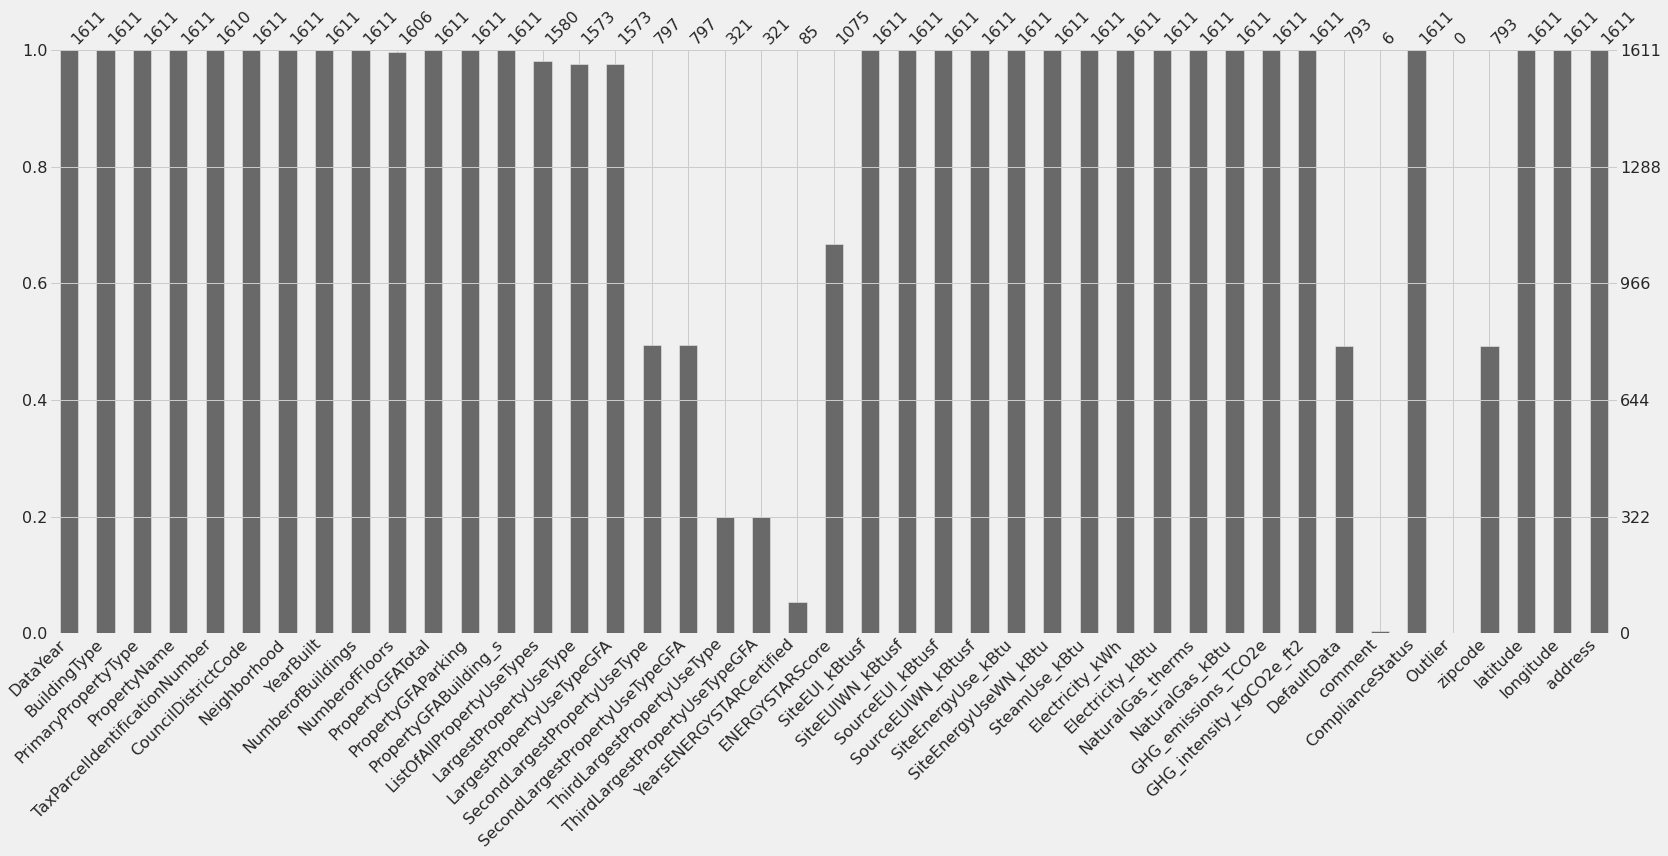

In [39]:
msno.bar(data)

In [40]:
print("{} rows / {} columns".format(data.shape[0], data.shape[1]))      
# drop columns with less than 10% data 
data = data.dropna(axis=1, thresh=data.shape[0]*0.15, how='all')
# drop empty rows
data = data.dropna(axis=0, how='all')
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

1611 rows / 43 columns
Remaining data : 1611 rows / 40 columns


**PopertyUseTypes features**

For the missing values of the columns related to the uses of the buildings, we will distinguish the buildings for which the uses are completely unknown from the buildings which have only one or 2 uses.

In [41]:
# check if we have some PropertyUseTypes with missing ListOfAllPropertyUseTypes
mask = data.ListOfAllPropertyUseTypes.isnull() & (data.LargestPropertyUseType.notnull()\
                                                  | data.SecondLargestPropertyUseType.notnull()\
                                                  | data.ThirdLargestPropertyUseType.notnull())
data[mask]

Empty DataFrame
Columns: [DataYear, BuildingType, PrimaryPropertyType, PropertyName, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding_s, ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI_kBtusf, SiteEUIWN_kBtusf, SourceEUI_kBtusf, SourceEUIWN_kBtusf, SiteEnergyUse_kBtu, SiteEnergyUseWN_kBtu, SteamUse_kBtu, Electricity_kWh, Electricity_kBtu, NaturalGas_therms, NaturalGas_kBtu, GHG_emissions_TCO2e, GHG_intensity_kgCO2e_ft2, DefaultData, ComplianceStatus, zipcode, latitude, longitude, address]
Index: []

In [42]:
def fill_property_usetypes(row):
    if not row['ListOfAllPropertyUseTypes'] or isinstance(row['ListOfAllPropertyUseTypes'], float):
        row['ListOfAllPropertyUseTypes'] = 'unknown'
        row['LargestPropertyUseType'] = 'unknown'
        row['SecondLargestPropertyUseType'] = 'unknown'
        row['ThirdLargestPropertyUseType'] = 'unknown'
    elif len(row['ListOfAllPropertyUseTypes']) == 1:
        row['LargestPropertyUseType'] = row['ListOfAllPropertyUseTypes'][0]
        row['SecondLargestPropertyUseType'] = 'no second use'
        row['SecondLargestPropertyUseTypeGFA'] = 0
        row['ThirdLargestPropertyUseType'] = 'no third use'
        row['ThirdLargestPropertyUseTypeGFA'] = 0
    elif len(row['ListOfAllPropertyUseTypes']) == 2:
        row['ThirdLargestPropertyUseType'] = 'no third use'
        row['ThirdLargestPropertyUseTypeGFA'] = 0
    elif len(row['ListOfAllPropertyUseTypes']) > 1 and isinstance(row['LargestPropertyUseType'], float):
        row['LargestPropertyUseType'] = 'unknown'
        row['SecondLargestPropertyUseType'] = 'unknown'
        row['ThirdLargestPropertyUseType'] = 'unknown'

    return row

data = data.apply(lambda row: fill_property_usetypes(row), axis=1)

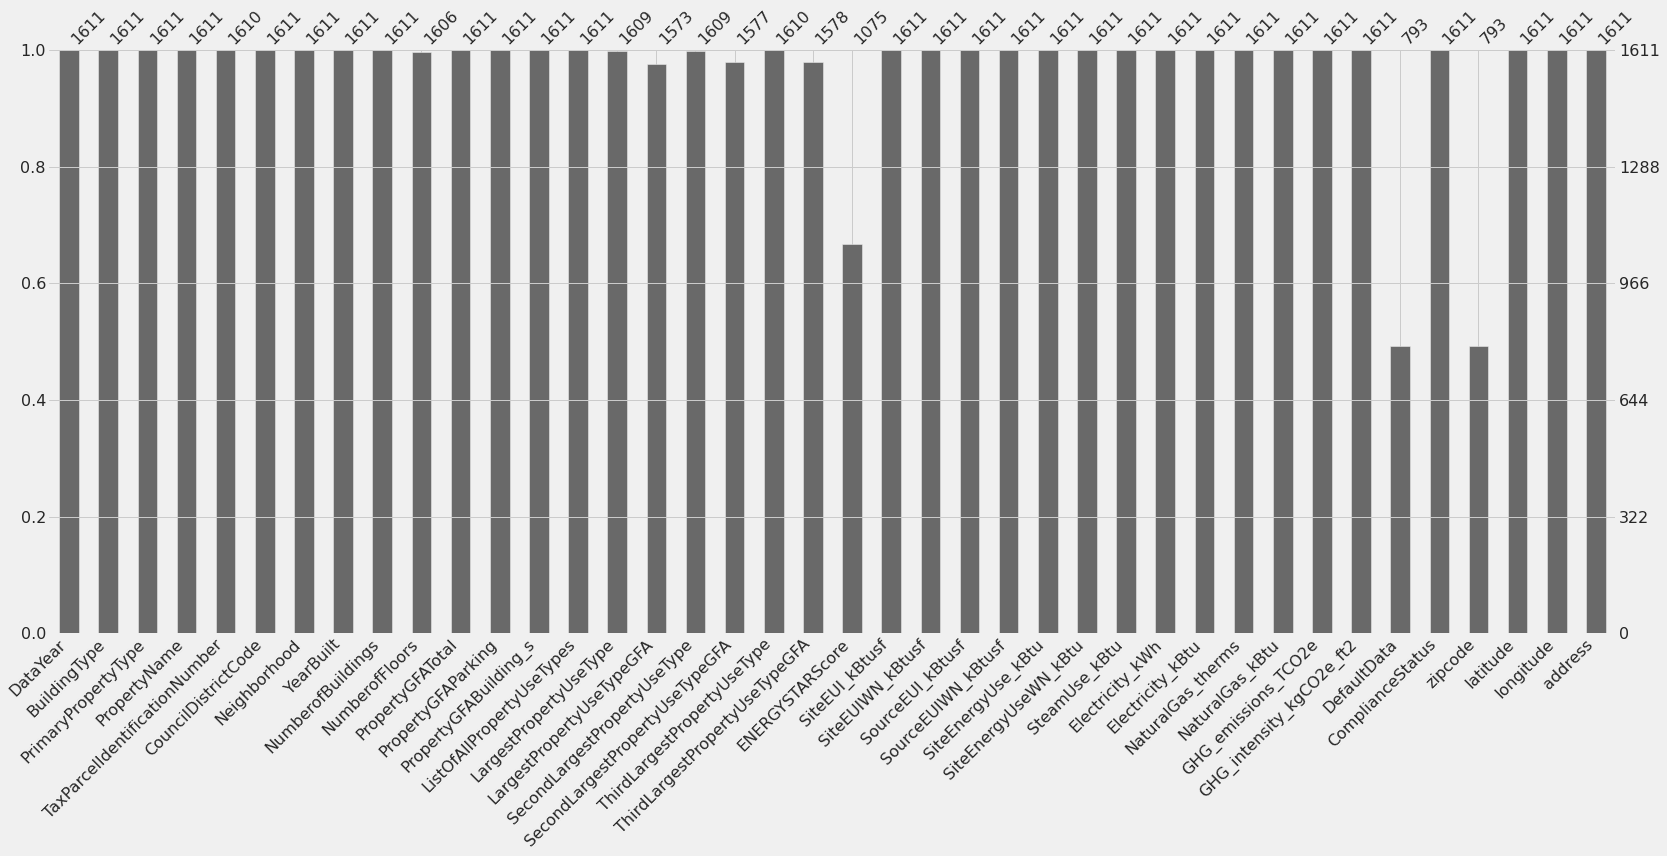

In [43]:
msno.bar(data)

In [44]:
data.isnull().sum().sort_values(ascending=False)

zipcode                            818
DefaultData                        818
ENERGYSTARScore                    536
LargestPropertyUseTypeGFA           38
SecondLargestPropertyUseTypeGFA     34
ThirdLargestPropertyUseTypeGFA      33
NumberofFloors                       5
LargestPropertyUseType               2
SecondLargestPropertyUseType         2
TaxParcelIdentificationNumber        1
ThirdLargestPropertyUseType          1
SiteEnergyUseWN_kBtu                 0
SteamUse_kBtu                        0
Electricity_kWh                      0
NaturalGas_therms                    0
Electricity_kBtu                     0
SourceEUIWN_kBtusf                   0
NaturalGas_kBtu                      0
GHG_emissions_TCO2e                  0
GHG_intensity_kgCO2e_ft2             0
ComplianceStatus                     0
latitude                             0
longitude                            0
SiteEnergyUse_kBtu                   0
DataYear                             0
SourceEUI_kBtusf         

### Irrelevant Features

The Weather Normalized features are the energy consumption taking into account the weather conditions. Since the geographical area is limited to the city of Seattle, we can consider these values redundant with the original values.

The 'Electricity(kWh)' and 'NaturalGas(therms)' are also redundant as we have the same values in kBTU (British Thermal Unit).

We can also drop some location features to only keep longitute and latitude

In [45]:
# extract location data for display in the EDA section
df_loc = data[[
    'PropertyName',
    'address',
    'Neighborhood',
    'longitude',
    'latitude',
]].copy()

In [46]:
cols_to_del = [
    'DefaultData',
    # identification / location
    'PropertyName',
    'TaxParcelIdentificationNumber',
    'CouncilDistrictCode',
    'address',
    'Neighborhood',
    'zipcode',
    # redundant values
    'Electricity_kWh',
    'NaturalGas_therms',
]

# columns containing WN are Weather Normalized
cols_to_del.extend([col for col in data.columns if 'WN' in col])

data = data.drop(columns=cols_to_del)

## Feature Engineering

In [47]:
# Number of propertyUseTypes
data['n_propertyUseTypes'] = [len(x) if x else 0 for x in data.ListOfAllPropertyUseTypes]

# Building Age
data['buildingAge'] = data['DataYear'] - data['YearBuilt']

# drop used columns
data.drop(columns=['ListOfAllPropertyUseTypes', 'DataYear', 'YearBuilt'], inplace=True)

In [48]:
# boolean columns to know if the building use electricity and/or gas  
data['consumeElectricity'] = data['Electricity_kBtu'] != 0
data['consumeGas'] = data['NaturalGas_kBtu'] != 0
data['consumeSteam'] = data['SteamUse_kBtu'] != 0

In [49]:
val_cnt = pd.DataFrame([data['consumeElectricity'].value_counts(), data['consumeGas'].value_counts(), data['consumeSteam'].value_counts()])

fig = make_subplots(rows=2, cols=2,
                    horizontal_spacing=0.1, vertical_spacing=0.15,
                    specs=[[{"type": "box"}, {"type": "bar"}],
                           [{"type": "histogram", "colspan": 2}, None]],
                    subplot_titles=("ProPerty Use Types", "Used Energy", 'Building Age'))

fig.add_trace(go.Box(y=data['n_propertyUseTypes'], name='Property Use Types', boxmean=True, marker_color='blue'), row=1, col=1)

fig.add_trace(go.Bar(x=val_cnt.index, y=val_cnt[True], marker_color='#2ad457', name="Used"), row=1, col=2)
fig.add_trace(go.Bar(x=val_cnt.index, y=val_cnt[False], marker_color='#fa5c4b', name='Not used'), row=1, col=2)

fig.add_trace(go.Histogram(x=data.buildingAge, name='Building Age', marker_color='#a791db'), row=2, col=1)

fig.update_layout(width=1000, height=700, barmode='stack',
                  bargap=0.1, showlegend=False,
                  title="Feature Engineering", **plotly_base_params)
fig.show()

Almost all buildings consume electricity. So the consumeElec column contains very few false values. It is therefore not relevant to keep this column

In [50]:
data.drop(columns='consumeElectricity', inplace=True)

**Reduction of high correlation**

In [51]:
threshold = 0.7
corr_pairs = data.corr().unstack().sort_values(kind="quicksort")
strong_corr = pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)].reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                          level_1  corr_coeff
28      PropertyGFABuilding_s                 PropertyGFATotal       0.968
26           SourceEUI_kBtusf                   SiteEUI_kBtusf       0.945
24           Electricity_kBtu               SiteEnergyUse_kBtu       0.941
22  LargestPropertyUseTypeGFA            PropertyGFABuilding_s       0.932
20  LargestPropertyUseTypeGFA                 PropertyGFATotal       0.930
18        GHG_emissions_TCO2e               SiteEnergyUse_kBtu       0.809
16           PropertyGFATotal                 Electricity_kBtu       0.809
14           Electricity_kBtu            PropertyGFABuilding_s       0.789
12           Electricity_kBtu        LargestPropertyUseTypeGFA       0.783
10   GHG_intensity_kgCO2e_ft2                   SiteEUI_kBtusf       0.773
8         GHG_emissions_TCO2e                  NaturalGas_kBtu       0.771
6          SiteEnergyUse_kBtu                 PropertyGFATotal       0.755
4          SiteEnergyUse_kBtu            PropertyGFABuilding_s       0.748
2          SiteEnergyUse_kBtu        LargestPropertyUseTypeGFA       0.747
0            PropertyGFATotal  SecondLargestPropertyUseTypeGFA       0.740

In [52]:
data['GFABuildingRate'] = round(data['PropertyGFABuilding_s'] / data['PropertyGFATotal'], 5)
#data['GFAParkingRate'] = round(data['PropertyGFAParking'] / data['PropertyGFATotal'], 5)
data['LargestPropertyUseTypeGFA_rate'] = round(data['LargestPropertyUseTypeGFA'] / data['PropertyGFATotal'], 5)
data['SecondPropertyUseTypeGFA_rate'] = round(data['SecondLargestPropertyUseTypeGFA'] / data['PropertyGFATotal'], 5)
data['ThirdPropertyUseTypeGFA_rate'] = round(data['ThirdLargestPropertyUseTypeGFA'] / data['PropertyGFATotal'], 5)

data = data.drop(columns=['PropertyGFABuilding_s',
                          #'PropertyGFAParking',
                          'LargestPropertyUseTypeGFA',
                          'SecondLargestPropertyUseTypeGFA',
                          'ThirdLargestPropertyUseTypeGFA'])

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 1 to 50226
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BuildingType                    1611 non-null   object 
 1   PrimaryPropertyType             1611 non-null   object 
 2   NumberofBuildings               1611 non-null   float64
 3   NumberofFloors                  1606 non-null   float64
 4   PropertyGFATotal                1611 non-null   int64  
 5   PropertyGFAParking              1611 non-null   int64  
 6   LargestPropertyUseType          1609 non-null   object 
 7   SecondLargestPropertyUseType    1609 non-null   object 
 8   ThirdLargestPropertyUseType     1610 non-null   object 
 9   ENERGYSTARScore                 1075 non-null   float64
 10  SiteEUI_kBtusf                  1611 non-null   float64
 11  SourceEUI_kBtusf                1611 non-null   float64
 12  SiteEnergyUse_kBtu              1

## EDA

In [54]:
data.describe().T

count        mean         std       min  \
NumberofBuildings              1611.000       1.048       0.495     1.000   
NumberofFloors                 1606.000       3.707       5.169     1.000   
PropertyGFATotal               1611.000   91686.608  123463.799 11285.000   
PropertyGFAParking             1611.000   10584.272   34210.873    -2.000   
ENERGYSTARScore                1075.000      64.718      28.227     1.000   
SiteEUI_kBtusf                 1611.000      68.391      66.962     0.000   
SourceEUI_kBtusf               1611.000     166.982     162.021     0.000   
SiteEnergyUse_kBtu             1611.000 5178182.831 6836926.271     0.000   
SteamUse_kBtu                  1611.000  183292.236 1160424.931     0.000   
Electricity_kBtu               1611.000 3726424.117 5491066.024     0.000   
NaturalGas_kBtu                1611.000 1264525.987 2202283.278     0.000   
GHG_emissions_TCO2e            1611.000     107.285     163.464     0.000   
GHG_intensity_kgCO2e_ft2       1611.000       1.417       1.996     0.000   
latitude                       1611.000      47.616       0.049    47.499   
longitude                      1611.000    -122.333       0.025  -122.412   
n_propertyUseTypes             1611.000       1.937       1.316     1.000   
buildingAge                    1611.000      54.251      32.702     1.000   
GFABuildingRate                1611.000       0.941       0.136     0.105   
LargestPropertyUseTypeGFA_rate 1573.000       0.868       0.297     0.186   
SecondPropertyUseTypeGFA_rate  1577.000       0.119       0.165     0.000   
ThirdPropertyUseTypeGFA_rate   1578.000       0.021       0.058     0.000   

                                       25%         50%         75%  \
NumberofBuildings                    1.000       1.000       1.000   
NumberofFloors                       1.000       2.000       4.000   
PropertyGFATotal                 28814.000   47554.000   97394.000   
PropertyGFAParking                   0.000       0.000       0.000   
ENERGYSTARScore                     47.500      72.000      88.000   
SiteEUI_kBtusf                      33.100      51.400      78.950   
SourceEUI_kBtusf                    76.900     129.000     198.850   
SiteEnergyUse_kBtu             1212692.625 2462408.250 6157736.500   
SteamUse_kBtu                        0.000       0.000       0.000   
Electricity_kBtu                716735.500 1581352.000 4307341.000   
NaturalGas_kBtu                      0.000  477808.000 1379251.000   
GHG_emissions_TCO2e                 19.450      47.420     127.010   
GHG_intensity_kgCO2e_ft2             0.275       0.780       1.715   
latitude                            47.585      47.613      47.650   
longitude                         -122.344    -122.333    -122.321   
n_propertyUseTypes                   1.000       2.000       2.000   
buildingAge                         27.000      51.000      86.000   
GFABuildingRate                      1.000       1.000       1.000   
LargestPropertyUseTypeGFA_rate       0.696       0.967       1.000   
SecondPropertyUseTypeGFA_rate        0.000       0.000       0.230   
ThirdPropertyUseTypeGFA_rate         0.000       0.000       0.000   

                                        max  
NumberofBuildings                    11.000  
NumberofFloors                       99.000  
PropertyGFATotal                1249055.000  
PropertyGFAParking               407795.000  
ENERGYSTARScore                     100.000  
SiteEUI_kBtusf                      834.400  
SourceEUI_kBtusf                   2620.000  
SiteEnergyUse_kBtu             42584028.000  
SteamUse_kBtu                  18547858.000  
Electricity_kBtu               41680634.000  
NaturalGas_kBtu                19420391.000  
GHG_emissions_TCO2e                1597.560  
GHG_intensity_kgCO2e_ft2             21.100  
latitude                             47.734  
longitude                          -122.259  
n_propertyUseTypes                   11.000  
buildingAge     

In [55]:
# chart
fig = make_subplots(rows=1, cols=3,
                    horizontal_spacing=0.1,
                    specs=[[{"type": "box"}, {"type": "box"}, {"type": "box"}]],
                    subplot_titles=("CO2 Emissions (tCO2e)", "Energy Consumption (kBTU)", 'Energy Star Score'))

fig.add_trace(go.Box(y=data.GHG_emissions_TCO2e, boxmean=True, marker_color='#65cbe9', name='CO2 Emissions'), row=1, col=1)
fig.add_trace(go.Box(y=data.SiteEnergyUse_kBtu, boxmean=True, marker_color='#f6ac69', name='Energy Consumption'), row=1, col=2)
fig.add_trace(go.Box(y=data.ENERGYSTARScore, boxmean=True, marker_color='#84dcc6', name='Energy Star Score'), row=1, col=3)

# styling
fig.for_each_annotation(lambda a: a.update(text=f'<b>{a.text}</b>'))
fig.update_layout(width=1000, height=500, showlegend=False, **plotly_base_params)
fig.update_xaxes(visible=False)
fig.show()

The features I'll try to predict are the total amount of CO2 emission (GHG_emissions_TCO2e) and energy consumption (siteEnergyUse_kBtu)  
I also have to find if energystar_score if useful for the prediction because it's difficult to calculate this value

### CO2 Emissions

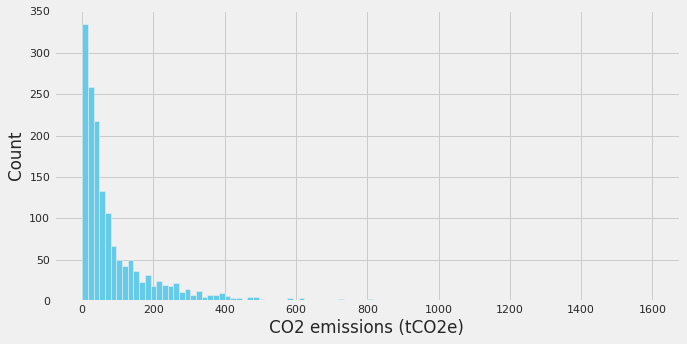

In [56]:
plt.figure(figsize=(10, 5))
plt.hist(data.GHG_emissions_TCO2e, bins=100, range=None, histtype='bar', color='#65cbe9')
plt.xlabel('CO2 emissions (tCO2e)')
plt.ylabel('Count')
plt.show()

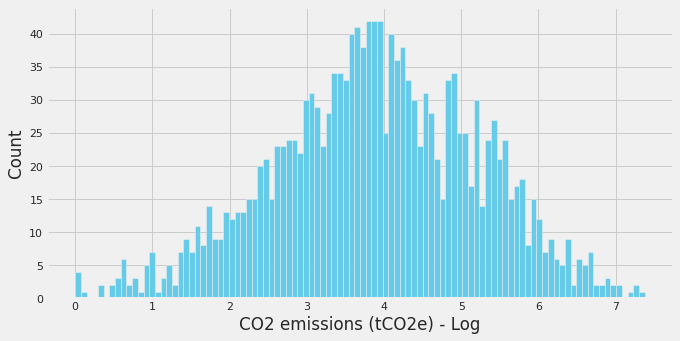

In [57]:
plt.figure(figsize=(10, 5))
plt.hist(np.log1p(data.GHG_emissions_TCO2e), bins=100, range=None, histtype='bar', color='#65cbe9')
plt.xlabel('CO2 emissions (tCO2e) - Log')
plt.ylabel('Count')
plt.show()

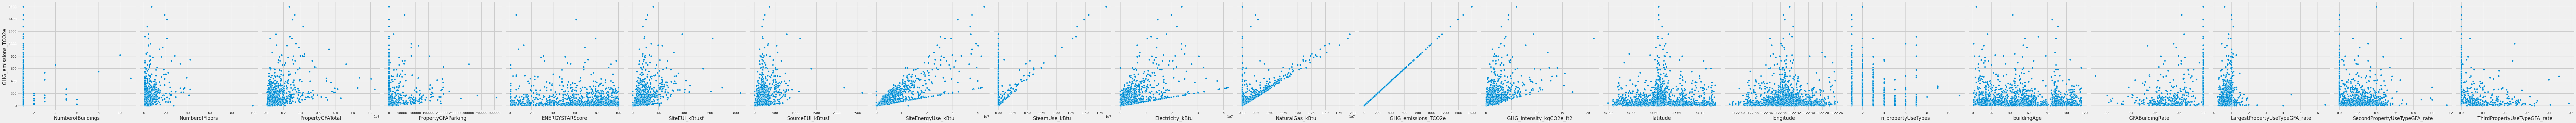

In [58]:
sns.pairplot(data.select_dtypes([int, float]), height=6,
             diag_kind=None,
             y_vars=['GHG_emissions_TCO2e'])
# double clic on plots to see their real size

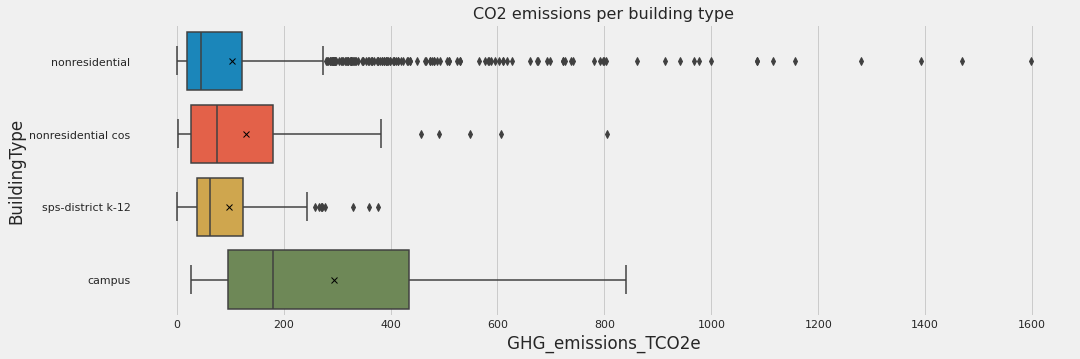

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('CO2 emissions per building type', fontsize=16)
sns.boxplot(y="BuildingType", x="GHG_emissions_TCO2e", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})
plt.show()

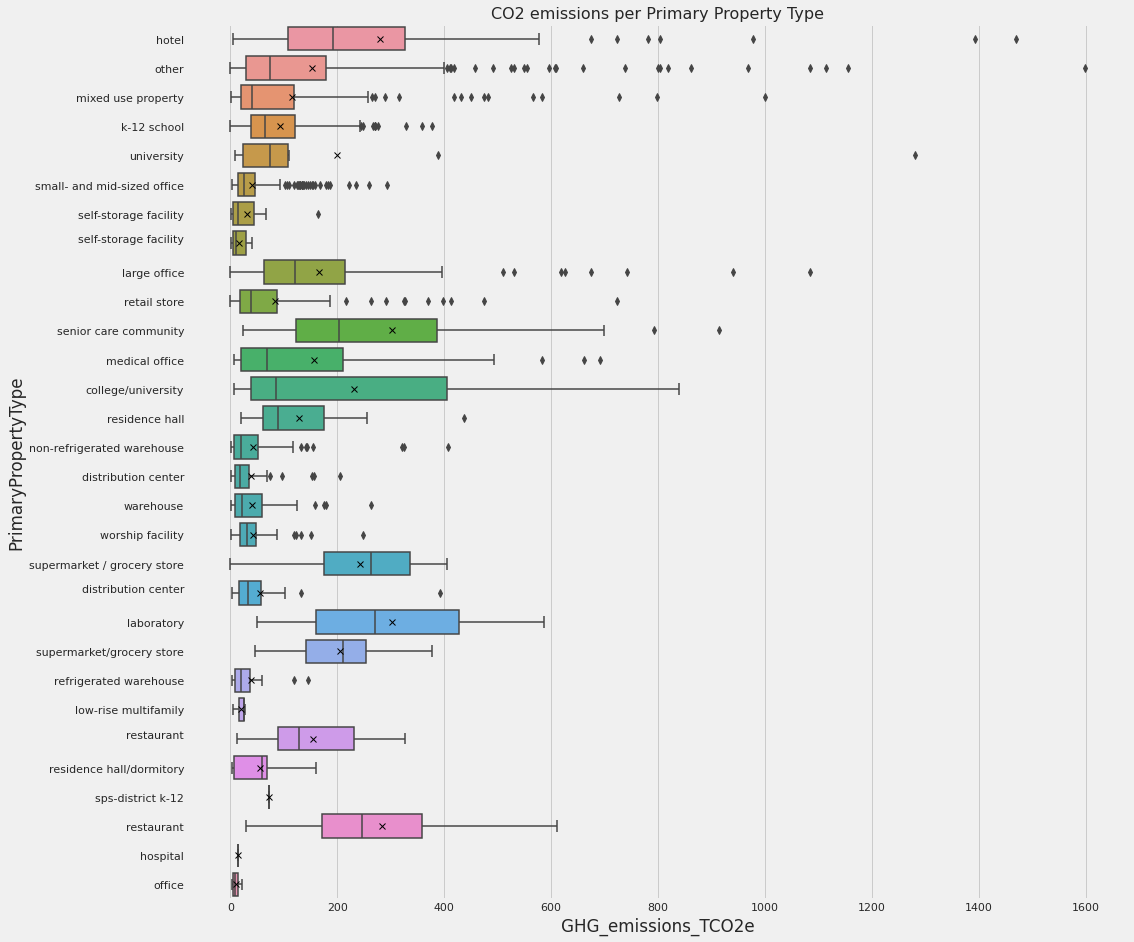

In [60]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('CO2 emissions per Primary Property Type', fontsize=16)
sns.boxplot(y="PrimaryPropertyType", x="GHG_emissions_TCO2e", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

### Energy consumption

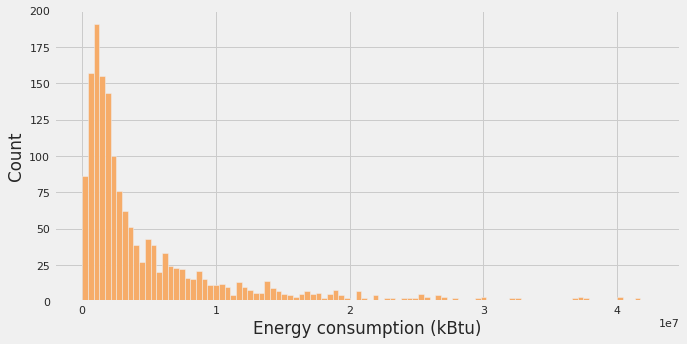

In [61]:
plt.figure(figsize=(10, 5))
plt.hist(data.SiteEnergyUse_kBtu, bins=100, range=None, histtype='bar', color='#f6ac69')
plt.xlabel('Energy consumption (kBtu)')
plt.ylabel('Count')
plt.show()

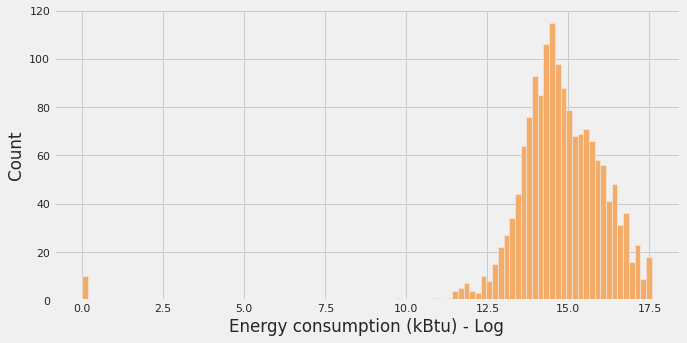

In [62]:
plt.figure(figsize=(10, 5))
plt.hist(np.log1p(data.SiteEnergyUse_kBtu), bins=100, range=None, histtype='bar', color='#f6ac69')
plt.xlabel('Energy consumption (kBtu) - Log')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

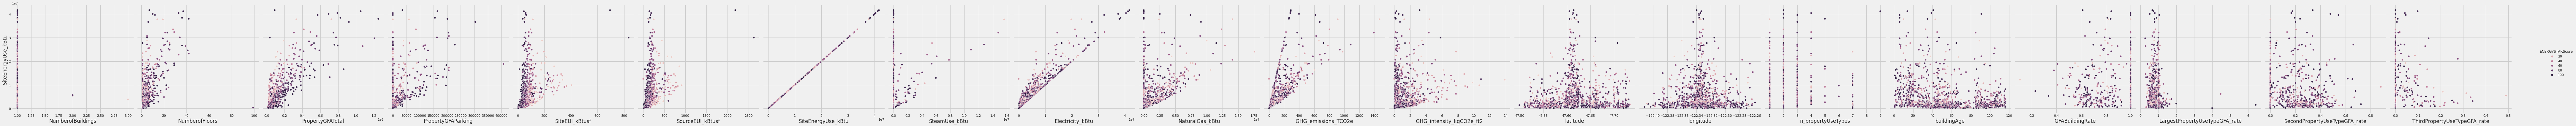

In [63]:
plt.figure()
sns.pairplot(data.select_dtypes([int, float]), height=6,
             hue='ENERGYSTARScore',
             diag_kind=None,
             y_vars='SiteEnergyUse_kBtu')
plt.show()

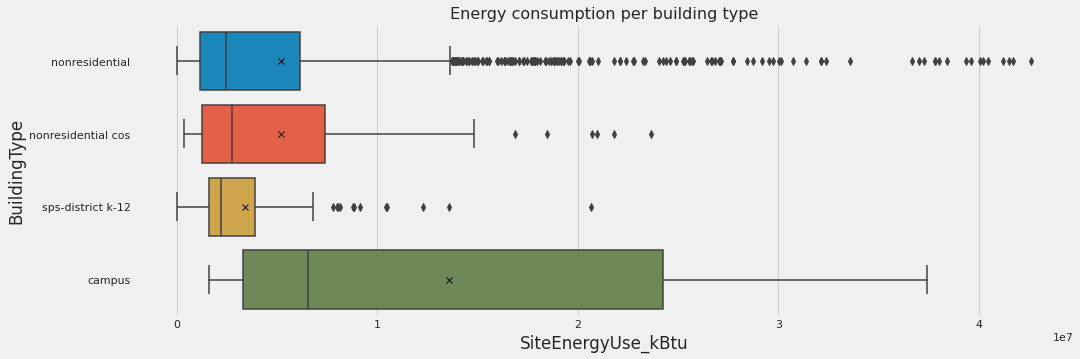

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Energy consumption per building type', fontsize=16)
sns.boxplot(y="BuildingType", x="SiteEnergyUse_kBtu", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

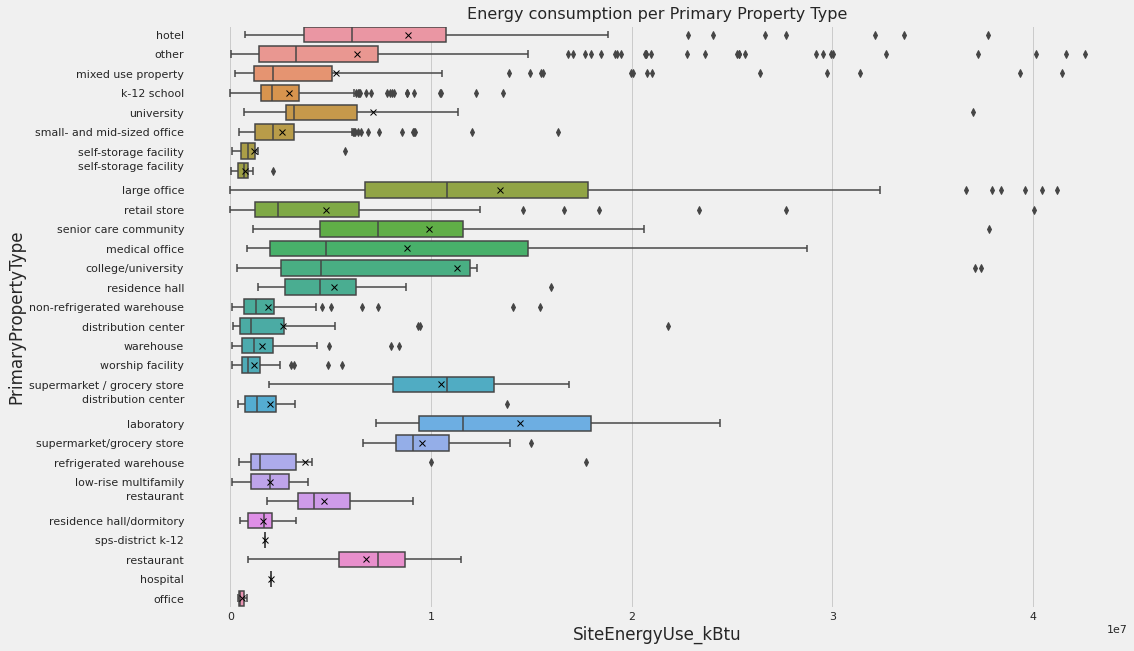

In [65]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Energy consumption per Primary Property Type', fontsize=16)
sns.boxplot(y="PrimaryPropertyType", x="SiteEnergyUse_kBtu", 
            data=data, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

### Location

In [66]:
import folium

map_seattle = folium.Map(location=[df_loc['latitude'].mean(), df_loc['longitude'].mean()], zoom_start=11)
for i in range(0, df_loc.shape[0]):
    folium.Marker(
        location=[df_loc.iloc[i]['latitude'], df_loc.iloc[i]['longitude']],
        popup=df_loc.iloc[i]['address'].capitalize() + " - " + df_loc.iloc[i]['Neighborhood'].upper(),
        tooltip=df_loc.iloc[i]['PropertyName'].capitalize(),
        #icon=folium.Icon(color=)
    ).add_to(map_seattle)
map_seattle

## Data Leakage

It can be considered that all the values calculated from the features to predict will not be available for predictions on new data and are therefore a source of leakage. As well as consumption values of the different energy sources for each building. 

In [67]:
# according to the column description in the metadata
leaky_cols = [
    'SiteEUI_kBtusf', 
    'SourceEUI_kBtusf', 
    'Electricity_kBtu', 
    'NaturalGas_kBtu', 
    'SteamUse_kBtu',
    'GHG_intensity_kgCO2e_ft2',
]
data.drop(columns=leaky_cols, inplace=True)

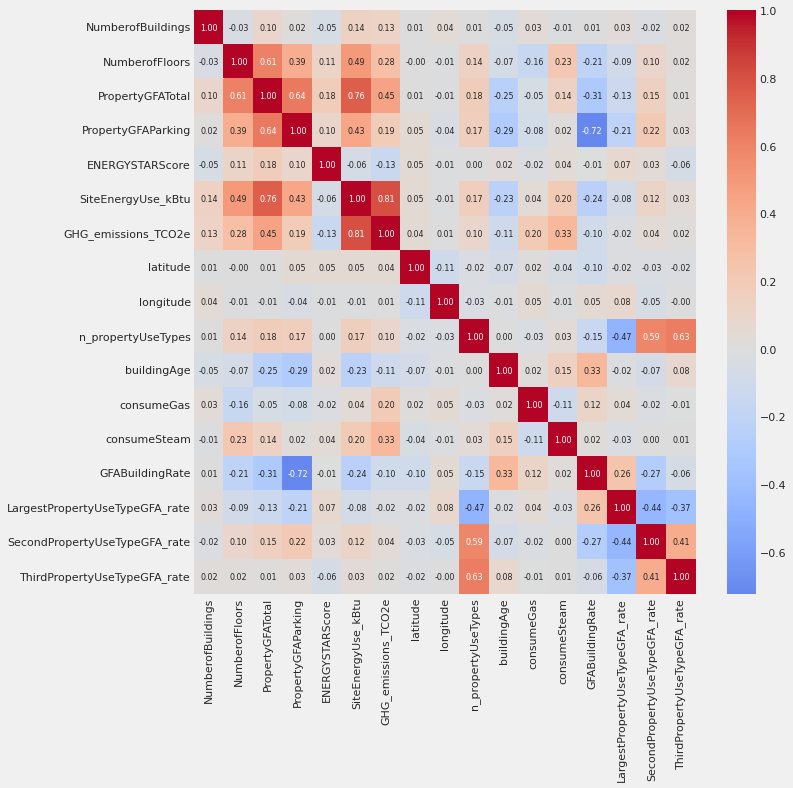

level_0              level_1  corr_coeff
4  SiteEnergyUse_kBtu  GHG_emissions_TCO2e       0.809
2    PropertyGFATotal   SiteEnergyUse_kBtu       0.755
0     GFABuildingRate   PropertyGFAParking      -0.723

In [68]:
corr = data.corr(method="pearson")

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            center=0, cmap="coolwarm", annot=True, fmt=".2f",
            annot_kws={'size':8}, ax=ax)
plt.show()

threshold = 0.70
corr_pairs = data.corr().unstack().sort_values(kind="quicksort")
strong_corr = pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)].reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

## Save cleaned CSV

In [69]:
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

Remaining data : 1611 rows / 23 columns


In [70]:
data.to_csv(os.path.join(DATA_DIR, 'cleaned_data.csv'), sep=',', index=True)